Activity 3 (Wednesday)
As a reminder the objective of this study is to predict the total claim amount of a customer and study/investigate the impact of the factors (input features) on the target variable(total claim amount). That means in your exploratory data analysis, you have to look for patterns in this data that show interesting relationships among the input features as well as with relation to the target feature.

Get the numeric data into a dataframe called numerical and categorical columns in a dataframe called categorical. (You can use "np.number" and "object" to select the numerical data types and categorical data types respectively)
Now we will try to check the normality of the numerical variables visually
Use the Seaborn library to construct distribution plots for the numerical variables
Use the Matplotlib library to construct histograms.
Do the distributions for different numerical variables look like a normal distribution?
For the numerical variables, check for correlation between the input features. Note: this does not include the target feature.
Plot the Correlation Heatmap.
(Optional): Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
Customer_Analysis = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')
Customer_Analysis.head()

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize


In [31]:
numerical = Customer_Analysis.select_dtypes(include = np.number)

categorical = Customer_Analysis.select_dtypes(include = object) 
categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [ ]:
numerical.hist(figsize=(8,10)) 

In [ ]:
sns.pairplot(numerical)

In [ ]:
sns.displot(x = numerical.number_of_open_complaints, y=numerical.income)

<Axes: xlabel='number_of_open_complaints', ylabel='income'>

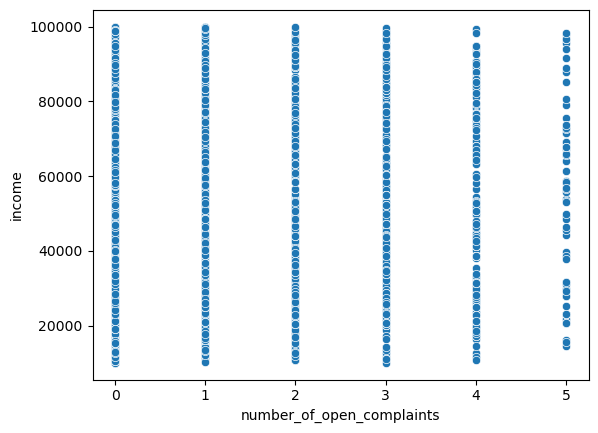

In [39]:
sns.scatterplot(x = numerical.number_of_open_complaints, y=numerical.income)


Text(0.5, 1.0, 'Heatmap')

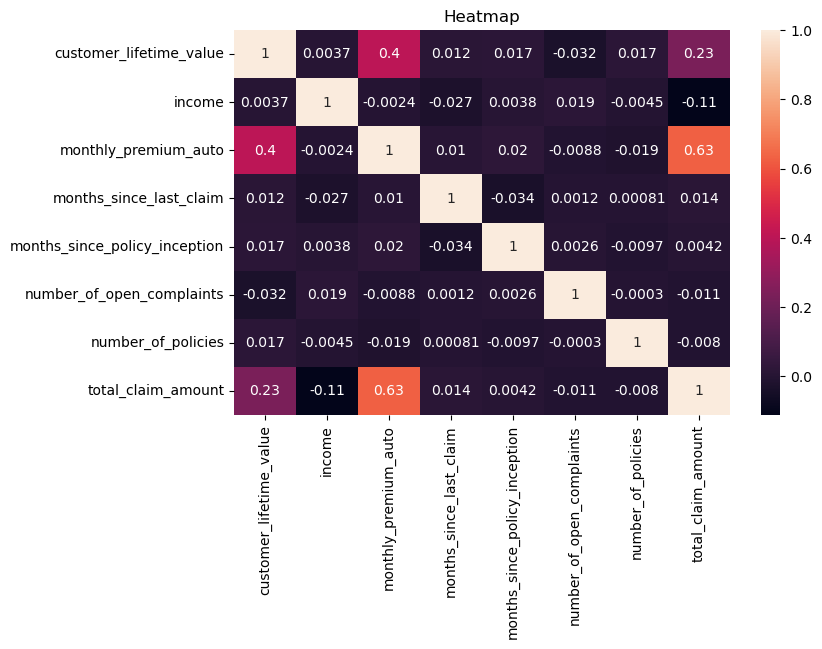

In [36]:
fig=plt.figure(figsize=(8,5))
sns.heatmap(numerical.corr(),annot=True)
plt.title('Heatmap')


In [37]:
corr_matrix = numerical.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
numerical = numerical.drop(numerical.columns[to_drop], axis=1)

print(corr_matrix)
print(upper)
print(to_drop)
print(numerical)

                               customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.003732   
income                                        0.003732  1.000000   
monthly_premium_auto                          0.404235  0.002431   
months_since_last_claim                       0.011912  0.026564   
months_since_policy_inception                 0.017055  0.003846   
number_of_open_complaints                     0.032371  0.018903   
number_of_policies                            0.016789  0.004461   
total_claim_amount                            0.232849  0.111221   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.404235                 0.011912   
income                                     0.002431                 0.026564   
monthly_premium_auto                       1.000000                 0.010036   
months_since_last_claim                    0.010036                

Activity 4 (Thursday)
Show a plot of the total number of responses.
Show a plot of the response by the total claim amount.
Show a plot of the response by income.
(Optional) plot any interesting findings/insights(minimum three) that describe some interesting facts about your data set and its input variables as well as relationships with the target feature.
Clean your notebook and make it readable and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots), Steps that you have performed.

In [58]:
Customer_Analysis.columns

Index(['region', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'month', 'employment_status',
       'gender', 'income', 'location_code', 'marital_status',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [48]:
responses = Customer_Analysis['response'].value_counts()
responses

no     9316
yes    1373
Name: response, dtype: int64

Text(0, 0.5, 'responses')

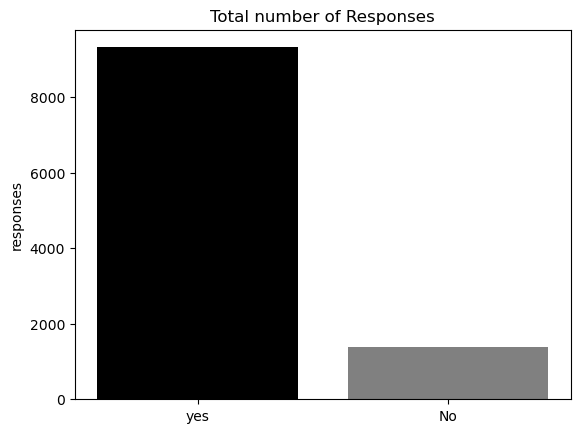

In [69]:
plt.bar(responses.index, responses,)
plt.bar(responses.index, responses, color=('black', 'grey'))
plt.title('Total number of Responses')
plt.xticks(ticks=[0,1], labels=['yes', 'No'])
plt.ylabel('responses')

In [93]:
#Show a plot of the response by the sales channel.
channels = Customer_Analysis['sales_channel'].value_counts()
channels

agent          4019
branch         2975
call center    2099
web            1596
Name: sales_channel, dtype: int64

<BarContainer object of 4 artists>

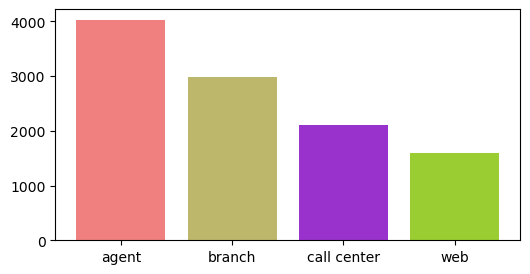

In [96]:
fig4, ax4 = plt.subplots(figsize = (6,3) )
ax4.bar(channels.index, channels, color=('lightcoral', 'darkkhaki', 'darkorchid', 'yellowgreen',))

<Axes: title={'center': 'Resposes by Sales Channel'}, xlabel='sales_channel', ylabel='count'>

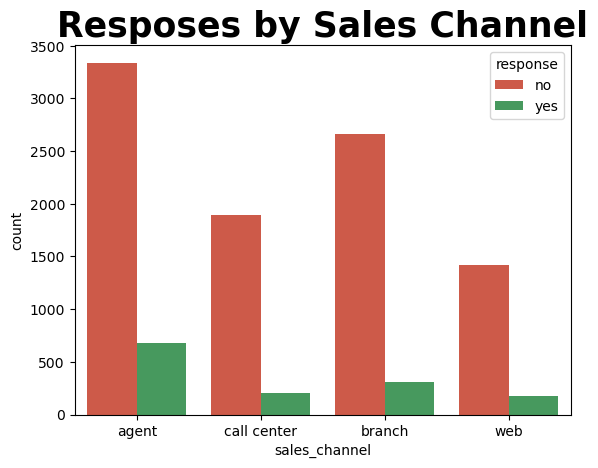

In [102]:
sns.set_palette('RdYlGn')
palette_response = {"yes": "C5", "no": "C0"}
plt.title('Resposes by Sales Channel', size='25', fontweight='bold')
sns.countplot(x = Customer_Analysis['sales_channel'], hue= Customer_Analysis['response'], palette=palette_response)

In [135]:
#Show a plot of the response by the total claim amount.

total_claims = Customer_Analysis['total_claim_amount']
print(total_claims.min())
print(total_claims.max())

0
2893


Text(0.5, 1.0, 'Response per Total Claim Amount')

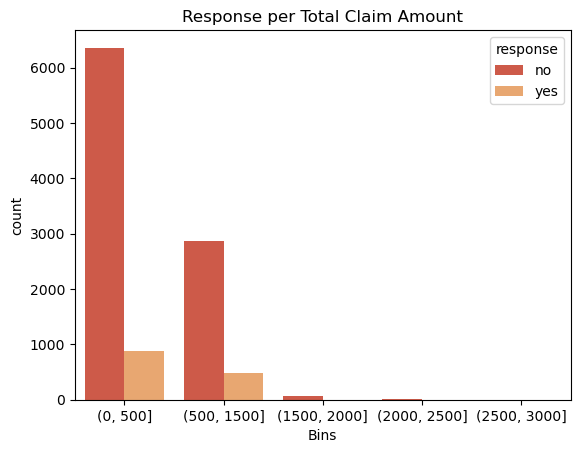

In [165]:
bins = [0, 500, 1500, 2000, 2500, 3000]
Customer_Analysis['Bins'] = pd.cut(Customer_Analysis['total_claim_amount'], bins=bins)
response_tca = Customer_Analysis.groupby(['Bins', 'response'])['total_claim_amount'].count().rename('count').reset_index()
response_plot = sns.barplot(x= response_tca['Bins'], y= response_tca['count'], hue = response_tca['response'])
response_plot.set_title('Response per Total Claim Amount')

In [160]:
bins = [0, 500, 1500, 2000, 2500, 3000]
Customer_Analysis['Bins'] = pd.cut(Customer_Analysis['total_claim_amount'], bins=bins)
response_tca = Customer_Analysis.groupby(['Bins', 'response'])['total_claim_amount'].count().reset_index()


In [161]:
response_tca

,Bins,response,total_claim_amount
0,"(0, 500]",no,6361
1,"(0, 500]",yes,882
2,"(500, 1500]",no,2865
3,"(500, 1500]",yes,490
4,"(1500, 2000]",no,59
5,"(1500, 2000]",yes,1
6,"(2000, 2500]",no,18
7,"(2000, 2500]",yes,0
8,"(2500, 3000]",no,4
9,"(2500, 3000]",yes,0


In [172]:
incomes = Customer_Analysis['income']
print(incomes.min())
print(incomes.max())

10037
99981


In [175]:
Customer_Analysis["Bins2"] = pd.cut(Customer_Analysis["income"], bins02, labels=["10000-20000","20000-30000", "30000-40000", "40000-50000", "50000-60000", "60000-70000","70000-80000","80000-90000","90000-100000","1000000"])

<Axes: title={'center': 'A plot of the response by Income'}, xlabel='Bins2', ylabel='count'>

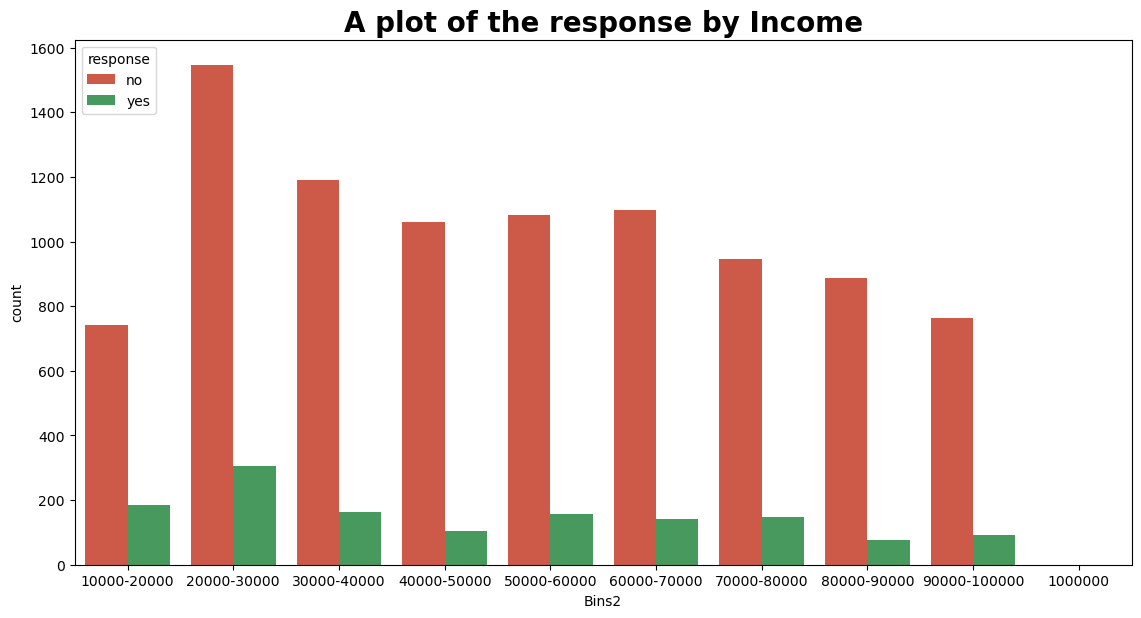

In [177]:
plt.figure(figsize=(30,15))
plt.subplot(2,2,1)
plt.title('A plot of the response by Income', size='20', fontweight='bold')

sns.countplot(x=Customer_Analysis["Bins2"], hue =Customer_Analysis ["response"],palette=palette_response)